###**Import libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import networkx as nx
import plotly.express as px
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
warnings.filterwarnings('ignore')
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## **Data Input**

In [6]:
transactions = pd.read_csv('Sample - Superstore.csv', encoding='Windows-1252')

In [7]:
transactions.drop(columns=['Row ID'], inplace = True )

In [8]:
transactions

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## print some information about the data

In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [10]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## **Data Cleaning**

In [11]:
transactions.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


## No missing values

In [12]:
transactions.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9989,False
9990,False
9991,False
9992,False


## No duplicated values

## **Data exploration**

In [13]:
product_sales = transactions.groupby('Product Name').agg({ 'Sales' :'sum',
                                                        'Quantity':'sum'
    }).reset_index().sort_values('Sales' ,ascending=False)

In [14]:
fig= px.bar(product_sales[:10] ,x='Sales' ,y='Product Name', orientation='h' ,color='Quantity' , text = 'Quantity'
            , title ='The Most selling products in the superstore over Sales amount and Quantity' )
fig.update_traces(textposition='outside')

##From this  bar chart,
##Canon imageCLASS 2200 Advanced Copier: High price, low sales volume, but contributes **the highest revenue**.


##GBC Ibimaster 500 Manual ProClick Binding System: Low price, **highest sales volume**, and high demand.

In [15]:
category_vs_sales_profit =transactions.groupby('Category').agg({
    'Sales' : 'sum' ,
    'Profit' : 'sum'}).reset_index()
lst= ['Sales','Profit']

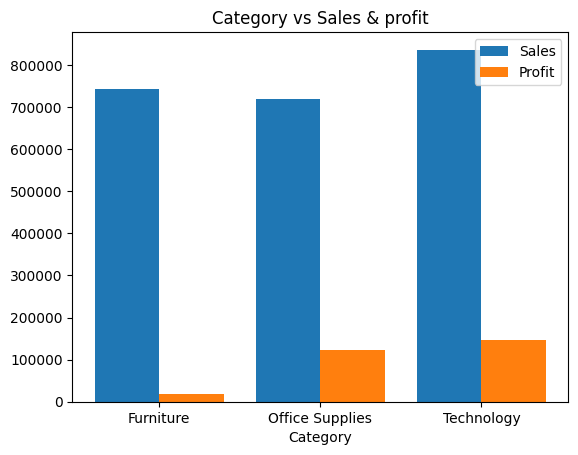

In [16]:
x = np.arange(len(category_vs_sales_profit['Category']))

plt.bar(x-.2  ,category_vs_sales_profit['Sales'] , .4 ,label ='Sales')
plt.bar(x+.2  ,category_vs_sales_profit['Profit'] , .4 ,label = 'Profit')
plt.xticks(x , category_vs_sales_profit['Category'])


plt.xlabel('Category')
plt.title("Category vs Sales & profit")
plt.legend(loc = 'upper right')
plt.show()

##From this  bar chart,

##Furniture: High sales but minimal profit.
##Office Supplies: Moderate sales with low profit.
##Technology: High sales and the highest profit.

In [17]:
region_vs_sales = transactions.groupby('Region')['Sales'].sum().reset_index()

<Axes: xlabel='Region', ylabel='Sales'>

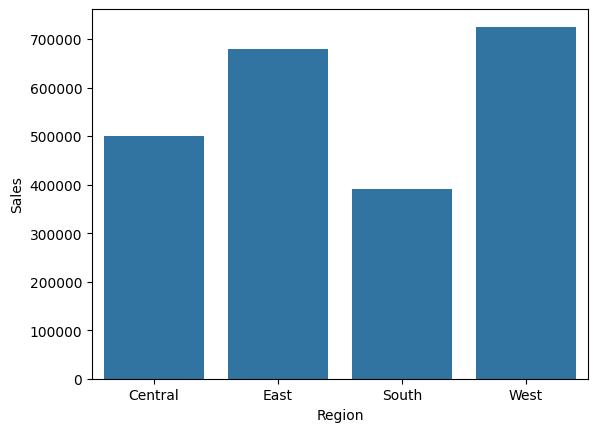

In [18]:
sns.barplot(region_vs_sales,x='Region' , y='Sales')

##From this  bar chart,
##East Region: Highest sales among all regions.
##West Region: Second-highest sales.
##Central Region: Moderate sales.
##South Region: Lowest sales.

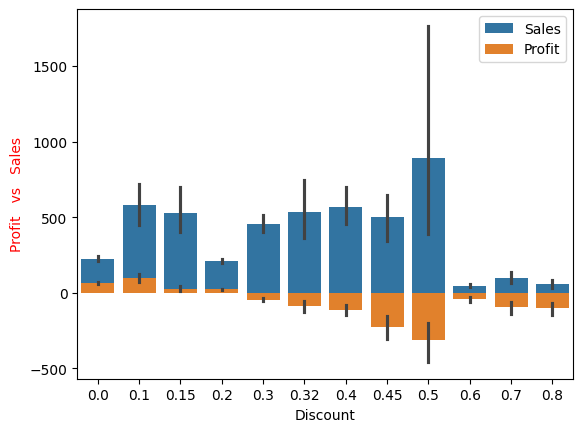

In [19]:
sns.barplot(transactions , x='Discount',y='Sales' ,label = 'Sales')
sns.barplot(transactions , x='Discount',y='Profit' , label = 'Profit')
plt.ylabel('Profit   vs   Sales', color ='r')
plt.show()

##From this  bar chart,
##The best sales are in 50% discount, but lead's to loss and non-profitablility.
##The Discount between 10 to 20% is the best solution as it gets better sales with good profitability

In [20]:
transactions['Profit Margin'] =transactions['Profit']/transactions['Sales']
margine_per_category = transactions.groupby('Category')['Profit Margin'].mean().reset_index()

<Axes: xlabel='Category', ylabel='Profit Margin'>

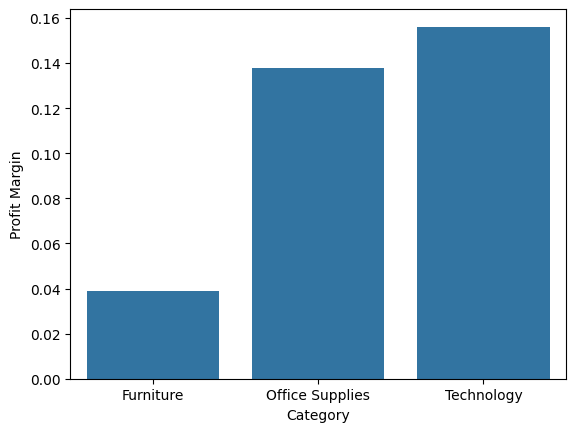

In [21]:
sns.barplot(margine_per_category,x='Category',y= 'Profit Margin')

##From this  bar chart,
##Furniture: Lowest profit margin.
##Office Supplies: Moderate profit margin.
##Technology: Highest profit margin.

In [22]:
subcategory_demand= transactions.groupby('Sub-Category').agg(
    {'Order ID':'count' ,
    'Category':'first'}
    ).reset_index().sort_values('Order ID',ascending=False).rename({'Order ID':'Number of Orders'},axis=1)

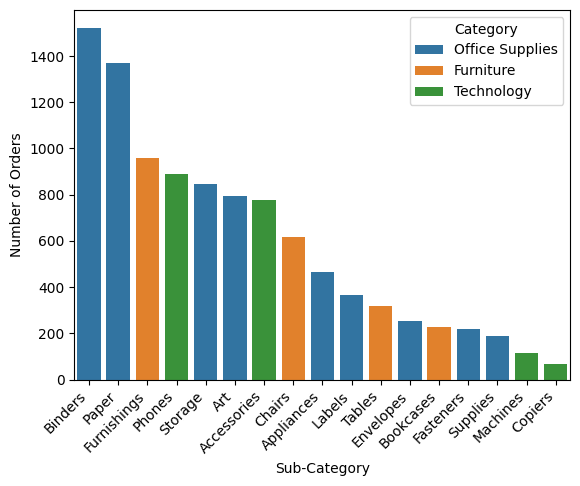

In [23]:
sns.barplot(subcategory_demand,x='Sub-Category' ,y='Number of Orders',hue='Category')
plt.xticks(rotation =45 ,ha ='right')
plt.show()

##From this  bar chart,
##Binders and Paper (Office Supplies): Highest number of orders, indicating strong demand.
##Copiers and Machines (Technology): Lowest number of orders, indicating weak demand.
##Furniture items like Furnishings and Chairs have moderate order volumes.

## **CustomerSegmentation**

In [24]:
# Step 1: Data Aggregation
# Convert the date column to datetime format
transactions['Order Date'] = pd.to_datetime(transactions['Order Date'])

# Current date, used to calculate Recency
current_date = datetime(2023, 12, 31)

# Aggregate by Customer ID
customer_data = transactions.groupby('Customer ID').agg({
    'Sales': 'sum',  # Total sales amount
    'Order ID': 'count',  # Total number of orders
    'Quantity': 'sum',  # Total quantity purchased
    'Discount': 'mean',  # Average discount
    'Profit': 'sum',  # Total profit
    'Order Date': lambda x: (current_date - x.max()).days  # Days since last purchase (Recency)
}).rename(columns={
    'Sales': 'Total Sales',
    'Order ID': 'Total Orders',
    'Quantity': 'Total Quantity',
    'Discount': 'Avg Discount',
    'Profit': 'Total Profit',
    'Order Date': 'Recency'
}).reset_index()

In [25]:
# Step 2: Data Standardization
scaler = StandardScaler()
features = ['Total Sales', 'Total Orders', 'Total Quantity', 'Avg Discount', 'Recency']
customer_data_scaled = scaler.fit_transform(customer_data[features])

In [26]:
# Step 3: Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming we want to divide into 4 clusters
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

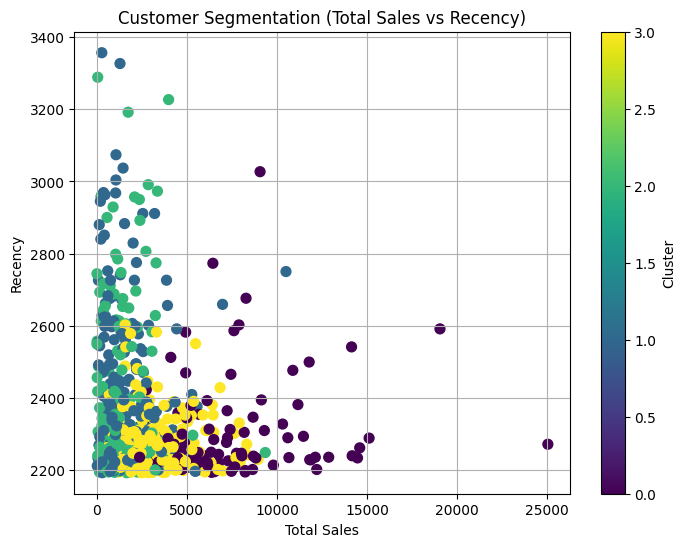

In [27]:
# Step 4: Visualizing Results (using Total Sales and Recency as an example)
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['Total Sales'], customer_data['Recency'], c=customer_data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Customer Segmentation (Total Sales vs Recency)')
plt.xlabel('Total Sales')
plt.ylabel('Recency')
plt.grid()
plt.show()

In [28]:
# 5. Using the Elbow Method to Find a Reasonable Range for k
inertia = []
k_range = range(2, 11)  # Testing for clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

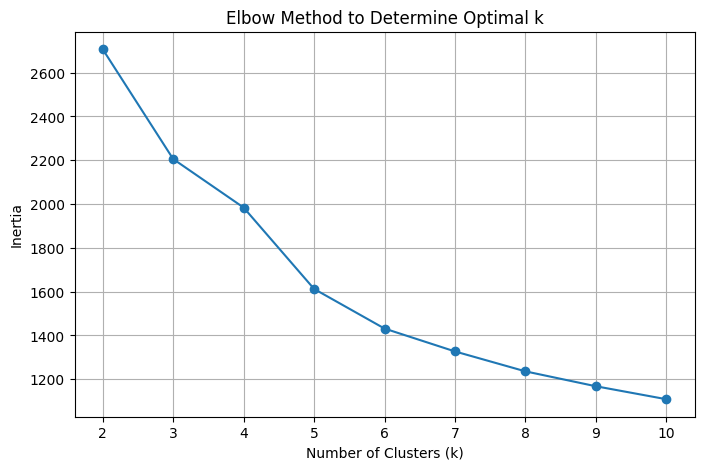

In [29]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


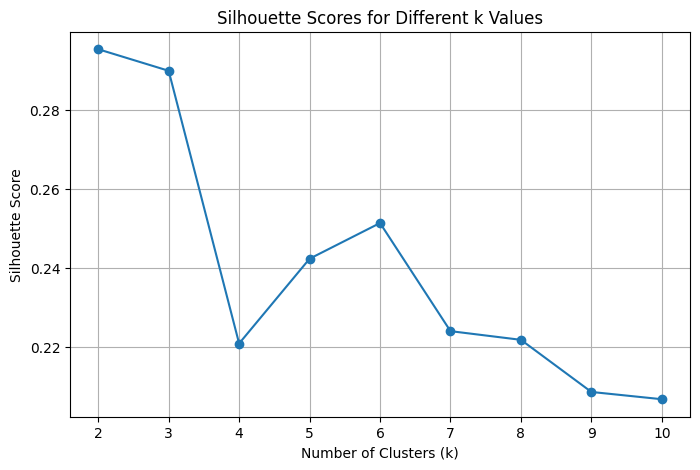

In [30]:
# Evaluating Clustering Quality Using the Silhouette Method
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_data_scaled)
    silhouette_scores.append(silhouette_score(customer_data_scaled, labels))

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [31]:
# Selecting the Best k Value Based on Evaluation (Assuming the Optimal k is 4)
optimal_k = 4

In [32]:
# Running KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Label'] = kmeans.fit_predict(customer_data_scaled)


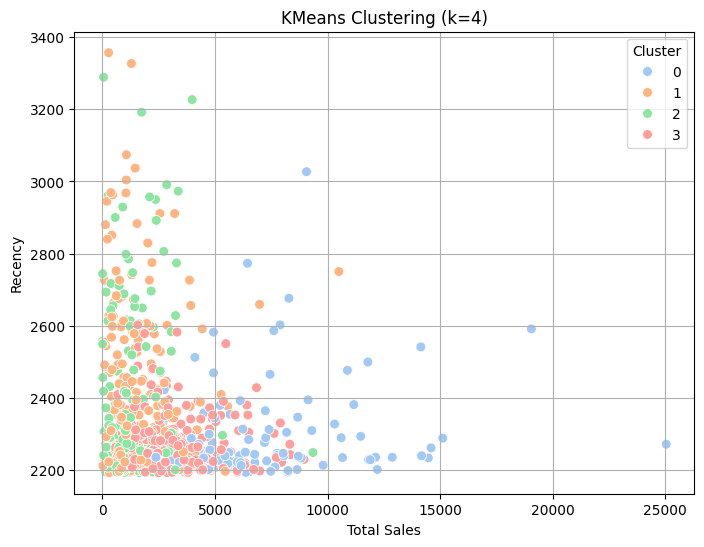

In [33]:
# Plotting the Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_data['Total Sales'],  # X-axis: Total Sales
    y=customer_data['Recency'],  # Y-axis: Recency of Last Purchase
    hue=customer_data['Label'],  # Differentiate colors by cluster labels
    palette="pastel",  # Color palette
    s=50  # Size of the points
)
plt.title(f'KMeans Clustering (k={optimal_k})')  # Title of the plot
plt.xlabel('Total Sales')  # X-axis label
plt.ylabel('Recency')  # Y-axis label
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [34]:
# Summarizing the average features of each cluster using a pivot table
pivot = customer_data.pivot_table(
    values=['Total Sales', 'Total Orders', 'Total Quantity', 'Avg Discount', 'Recency'],
    index='Label',
    aggfunc=np.mean
)
print(pivot)

       Avg Discount      Recency  Total Orders  Total Quantity  Total Sales
Label                                                                      
0          0.158187  2297.579439     22.943925       88.719626  7136.119470
1          0.089362  2407.558952      8.039301       29.096070  1595.974300
2          0.264052  2400.356725      8.093567       30.169591  1461.324723
3          0.148042  2262.367133     15.083916       57.895105  3210.739283


In [35]:
# Printing statistical information for each cluster
for k in range(optimal_k):
    print(f"Cluster #{k}:")
    print(customer_data[customer_data['Label'] == k][['Total Sales', 'Total Orders', 'Total Quantity', 'Avg Discount', 'Recency']].describe())
    print("\n")

Cluster #0:
        Total Sales  Total Orders  Total Quantity  Avg Discount      Recency
count    107.000000    107.000000      107.000000    107.000000   107.000000
mean    7136.119470     22.943925       88.719626      0.158187  2297.579439
std     3687.341382      5.257217       21.372171      0.071737   134.575716
min     2224.000000     10.000000       34.000000      0.018182  2193.000000
25%     4780.442250     20.000000       77.000000      0.102381  2220.000000
50%     6234.910000     22.000000       87.000000      0.156250  2239.000000
75%     8464.646000     26.000000      102.000000      0.211250  2312.500000
max    25043.050000     37.000000      150.000000      0.332500  3027.000000


Cluster #1:
        Total Sales  Total Orders  Total Quantity  Avg Discount      Recency
count    229.000000    229.000000      229.000000    229.000000   229.000000
mean    1595.974300      8.039301       29.096070      0.089362  2407.558952
std     1334.932129      2.962223       11.507794 

##Cluster 0: Low income, moderate spending, likely budget-conscious or occasional shoppers.
##marketing strategies:Discount promotions, recommend cost-effective products, extend customer lifecycle.

##Cluster 1: High income, high spending, likely affluent or high-value customers.
##marketint strategies:Personalized services, premium membership programs, enhance brand value, cross-selling.

##Cluster 2: Moderate income, low spending, likely conservative or infrequent shoppers.
##marketint strategies:Incentivize purchases, maintain engagement, emphasize product value, improve shopping experience.

##Cluster 3: High-frequency shoppers with moderate spending and low recency, likely loyal or price-sensitive customers.
##marketint strategies:Strengthen loyalty, targeted promotions, enhance engagement, increase average order value (AOV).

## **Association rule**

In [36]:
transactions_list = transactions.groupby('Order ID')['Sub-Category'].apply(list)

In [37]:
transactions_list

,Sub-Category
Order ID,
CA-2014-100006,[Phones]
CA-2014-100090,"[Tables, Binders]"
CA-2014-100293,[Paper]
CA-2014-100328,[Binders]
CA-2014-100363,"[Fasteners, Paper]"
...,...
US-2017-168802,[Binders]
US-2017-169320,"[Art, Accessories]"
US-2017-169488,"[Paper, Paper]"


In [38]:
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [39]:
df

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5005,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5006,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5007,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [40]:
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
print("frequent itemset:")
frequent_itemsets

frequent itemset:


,support,itemsets
0,0.143342,(Accessories)
1,0.090038,(Appliances)
2,0.145937,(Art)
3,0.262727,(Binders)
4,0.044720,(Bookcases)
5,0.114993,(Chairs)
6,0.049711,(Envelopes)
7,0.042923,(Fasteners)
8,0.175085,(Furnishings)
9,0.069076,(Labels)


In [41]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

,support,itemsets
3,0.262727,(Binders)
11,0.237772,(Paper)
8,0.175085,(Furnishings)
12,0.162507,(Phones)
13,0.155121,(Storage)
2,0.145937,(Art)
0,0.143342,(Accessories)
5,0.114993,(Chairs)
1,0.090038,(Appliances)
9,0.069076,(Labels)


In [42]:
# Generate the rules with their corresponding support, confidence, and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules_sorted = rules.sort_values(by='confidence', ascending=False)
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
11,(Appliances),(Binders),0.025953,0.288248,1.097140
29,(Storage),(Binders),0.039728,0.256113,0.974826
27,(Phones),(Binders),0.039728,0.244472,0.930516
12,(Appliances),(Paper),0.021761,0.241685,1.016458
30,(Chairs),(Paper),0.026552,0.230903,0.971110
25,(Paper),(Binders),0.054901,0.230898,0.878853
40,(Storage),(Paper),0.035536,0.229086,0.963470
23,(Furnishings),(Binders),0.039529,0.225770,0.859332
1,(Accessories),(Binders),0.032142,0.224234,0.853486
38,(Phones),(Paper),0.034937,0.214988,0.904176


In [43]:
# Filter valuable rules,where lift > 0.8 and sort by confidence
valuable_rules = rules[(rules['lift'] > 0.8) & (rules['confidence'] > 0.2)]
valuable_rules = valuable_rules.sort_values(by='confidence', ascending=False)

# Display the filtered rules
valuable_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
11,(Appliances),(Binders),0.025953,0.288248,1.097140
29,(Storage),(Binders),0.039728,0.256113,0.974826
27,(Phones),(Binders),0.039728,0.244472,0.930516
12,(Appliances),(Paper),0.021761,0.241685,1.016458
30,(Chairs),(Paper),0.026552,0.230903,0.971110
25,(Paper),(Binders),0.054901,0.230898,0.878853
40,(Storage),(Paper),0.035536,0.229086,0.963470
23,(Furnishings),(Binders),0.039529,0.225770,0.859332
1,(Accessories),(Binders),0.032142,0.224234,0.853486
38,(Phones),(Paper),0.034937,0.214988,0.904176


**Cross Selling with Graph**

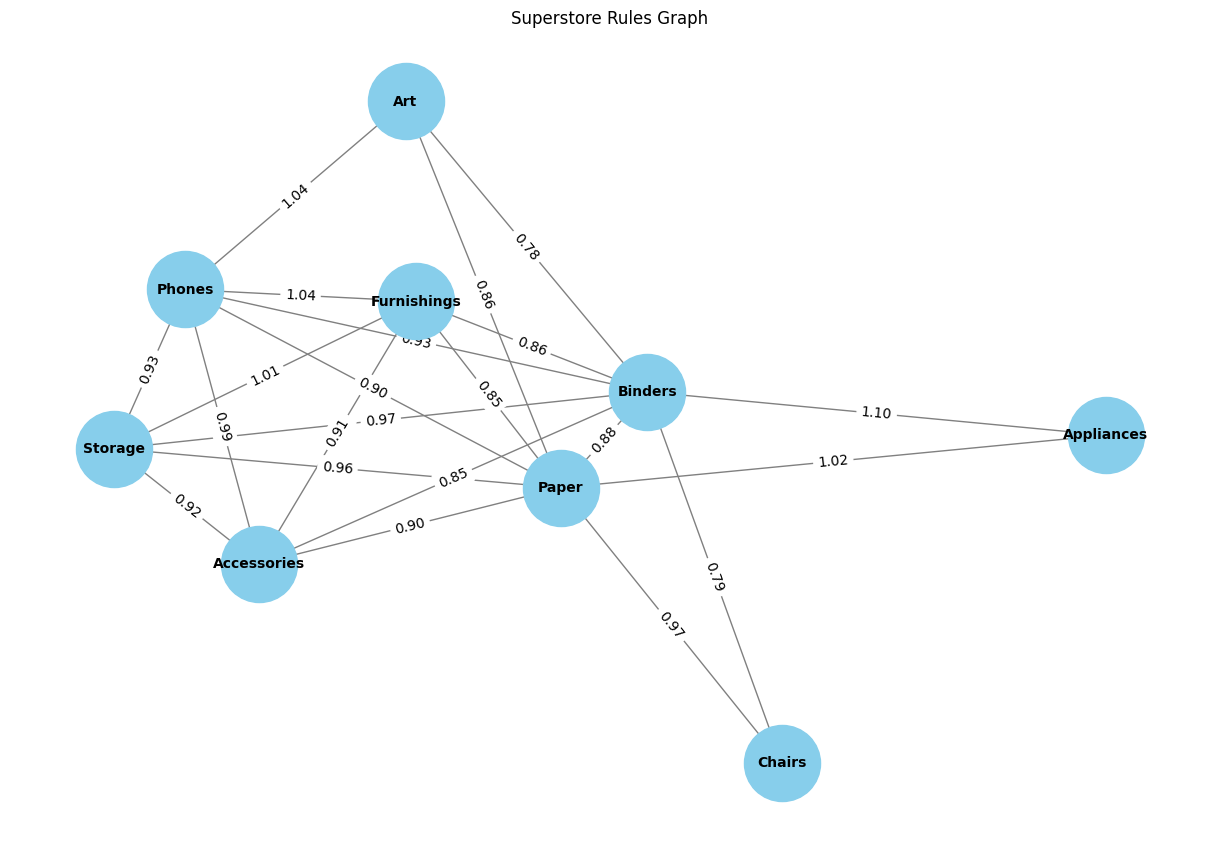

In [44]:
# Construct the graph from rules
G = nx.Graph()

# Add nodes and edges
for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="skyblue",
    font_size=10, font_weight="bold", edge_color="gray"
)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
plt.title("Superstore Rules Graph")
plt.show()

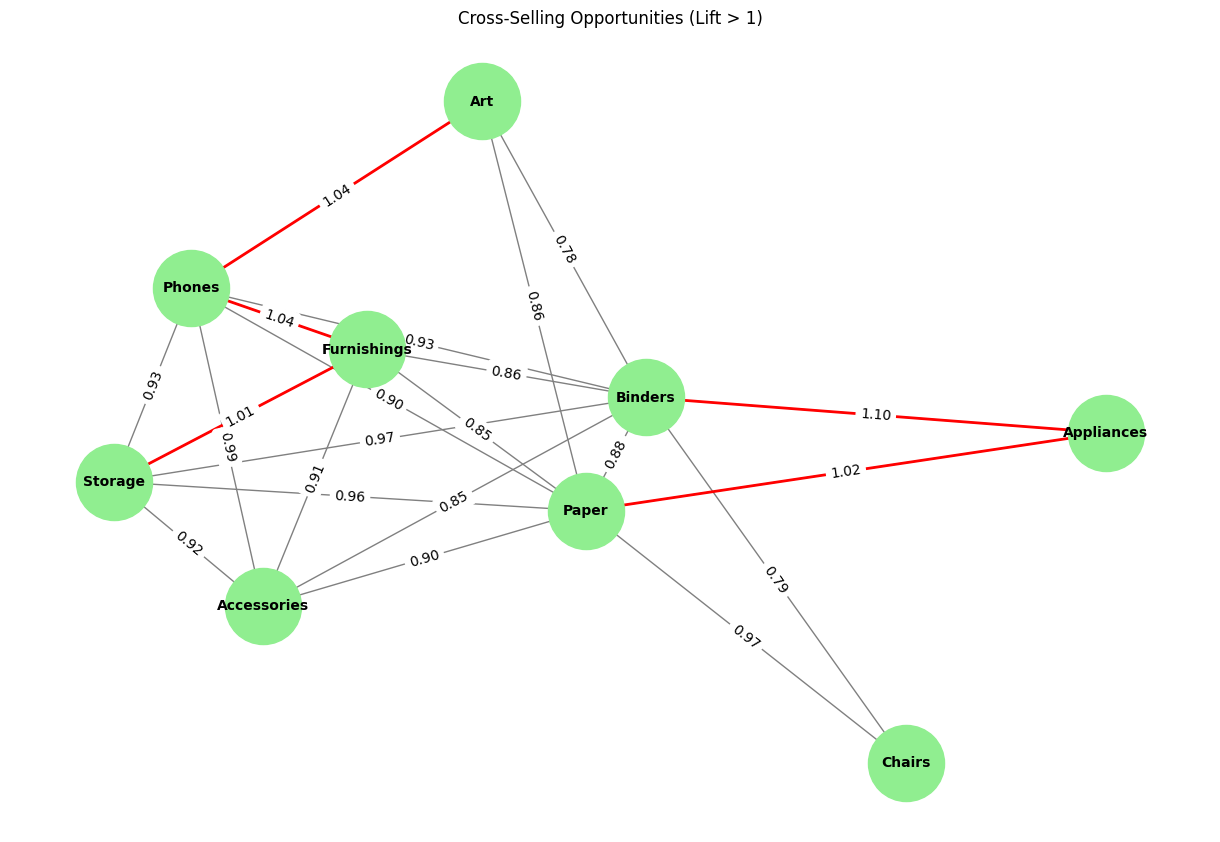

In [45]:
# Highlight edges with lift > 1 for cross-selling
strong_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > 1]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightgreen",
    font_size=10, font_weight="bold", edge_color="gray"
)
nx.draw_networkx_edges(G, pos, edgelist=strong_edges, edge_color="red", width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
plt.title("Cross-Selling Opportunities (Lift > 1)")
plt.show()

For example:

Phones and Art:The likelihood of customers purchasing both Phones and Art is 1.04 times that of purchasing Phones alone.

Strategy: Launch a "Technology + Aesthetics" promotional campaign, such as offering bundled discounts on Art products when purchasing Phones or recommending complementary items.

Implementation: Recommend Art products on the Phones product detail page, or provide coupons for Art products to customers who purchase Phones.

## **Collaborative Filtering with users**

In [46]:
transactions.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin'],
      dtype='object')

In [47]:
transactions

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,0.1625
9990,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,0.1700
9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,0.0750
9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,0.4500


In [48]:
# Create rating column
def generate_rating_score(df):
    # Initialize normalizers
    scaler_sales = MinMaxScaler()
    scaler_quantity = MinMaxScaler()

    # Normalize Sales and Quantity
    df['normalized_sales'] = scaler_sales.fit_transform(df[['Sales']])
    df['normalized_quantity'] = scaler_quantity.fit_transform(df[['Quantity']])

    # Calculate rating score
    df['rating'] = (df['normalized_sales'] * 0.5 + df['normalized_quantity'] * 0.3) * (1 - df['Discount'] * 0.5) + (df['Profit Margin'] * 0.2)
    df['rating'] = df['rating'] * 4 + 1  # Map ratings to a range of 1~5

    return df

Core Formula Explanation:
Sales Weighting:

Formula: df['normalized_sales'] * 0.5
Explanation: The weight for sales is set at 50% because sales represent a direct source of income for the business. It is generally considered the core indicator of a product's value.
Quantity Weighting:

Formula: df['normalized_quantity'] * 0.3
Explanation: The weight for purchase quantity is set at 30%. This represents the market popularity of the product. While it is important, it is not as directly related to revenue value as sales.
Discount Adjustment:

Formula: (1 - df['Discount'] * 0.5)
Explanation: Discounts are introduced as a penalty factor with a weight of 50%. The purpose is to limit the upward effect of excessively high discounts on the rating. The higher the discount, the lower the rating will be.
Profit Margin Weighting:

Formula: df['Profit Margin'] * 0.2
Explanation: The weight for profit margin is set at 20%. Profit margin is important for the long-term profitability of the business, but its impact is usually less than that of sales and quantity.
Mapping to Rating Scale:
Adjusting the Rating:
Formula: df['rating'] = df['rating'] * 4 + 1
Explanation: This line adjusts the rating to a common scale of 1 to 5. This makes it easier for users to understand and for the recommendation system to process.

Weight Distribution Rationale
The weight distribution in the scoring formula is based on the following logic:

Sales (50%)

Justification: Sales represent the direct source of income for a business, hence assigned the highest weight of 50%.
Theoretical Basis: The sales figures directly reflect the market value of a product. For example, in a recommendation system, products with higher sales are generally considered more popular.
Relevant Literature: Weighted Scoring Models (Saaty, 1980).
Purchase Quantity (30%)

Justification: Purchase quantity reflects the degree of market demand for a product and complements sales figures. While higher quantities may indicate lower prices, strong demand suggests a higher user preference.
Theoretical Basis: Quantity is an important indicator of user behavior; products that are frequently purchased are often more suitable for recommendations.
Relevant Literature: Item-based collaborative filtering recommendation algorithms (Sarwar et al., 2001).
Discount (Negative Factor, 50%)

Justification: Discounts are introduced as a penalty factor because excessively high discounts can dilute profits and imply that a product may rely on promotions to sell.
Theoretical Basis: Research by Blattberg and Neslin (1990) shows that while discounts can stimulate short-term sales, they may harm long-term profitability. The negative impact of discounts is controlled at 50% to prevent excessive lowering of scores.
Profit Margin (20%)

Justification: High-profit margin products have greater long-term value for a business; therefore, profit margin is included in the scoring with a weight of 20%.
Theoretical Basis: Research by Anderson et al. (1994) indicates that profit margin is a crucial factor in assessing a product's long-term value.
Theoretical Basis for Formula Design
Multi-Criteria Decision-Making (MCDM)

Weighted Scoring Models: This approach involves assigning weights to different dimensions to comprehensively consider the impact of multiple factors.
Theoretical Basis: Saaty's "The Analytic Hierarchy Process" (1980) emphasizes the scientific allocation of multi-dimensional weights, especially in recommendation systems and business decision-making.
Research on Recommendation Systems

Scoring Calculation: The scoring needs to reflect the overall appeal of a product to users, combining sales, purchase quantity, and other indicators, similar to the scoring models used by Netflix and Amazon.
Relevant Literature: Ricci et al. (2011) discuss multi-dimensional feature-based scoring methods in the "Recommender Systems Handbook."
Balancing Discounts and Profits

Justification: Discounts are an important promotional tool, but excessively high discounts can harm profits; hence, their impact on scoring needs to be adjusted moderately.
Relevant Cases: Retailers like Walmart and Target typically consider both sales and profit margins to optimize product recommendations.

In [49]:
# Generate ratings
transactions = generate_rating_score(transactions)

In [50]:
# Build the rating matrix (with Customer ID as columns and Product ID as rows)
ratings_matrix = transactions.pivot_table(index='Customer ID', columns='Product ID', values='rating').fillna(0)

# Transpose the matrix (with Customer ID as rows and Product ID as columns, for calculating user similarity)
user_ratings_matrix = ratings_matrix.T

# Calculate user similarity using Pearson correlation coefficient
user_similarity_df = user_ratings_matrix.corr(method='pearson')
user_similarity_df

Customer ID,AA-10315,AA-10375,AA-10480,AA-10645,AB-10015,AB-10060,AB-10105,AB-10150,AB-10165,AB-10255,...,VP-21760,VS-21820,VT-21700,VW-21775,WB-21850,XP-21865,YC-21895,YS-21880,ZC-21910,ZD-21925
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,1.000000,-0.006885,-0.006128,-0.007522,-0.004332,-0.007254,-0.007066,-0.006004,-0.006610,-0.006591,...,-0.006569,-0.004111,-0.005082,-0.007374,-0.009850,-0.009387,-0.004967,-0.005788,-0.008300,-0.005335
AA-10375,-0.006885,1.000000,-0.007146,0.053678,-0.005052,-0.008459,-0.008240,-0.007002,-0.007708,-0.007686,...,-0.007660,-0.004794,-0.005926,-0.008599,-0.011487,-0.010947,-0.005792,-0.006749,0.007062,-0.006221
AA-10480,-0.006128,-0.007146,1.000000,-0.007807,0.094280,-0.007529,-0.007333,-0.006232,-0.006860,-0.006841,...,-0.006818,-0.004266,-0.005274,-0.007653,-0.010223,-0.009743,-0.005155,-0.006007,-0.008614,-0.005537
AA-10645,-0.007522,0.053678,-0.007807,1.000000,-0.005520,-0.009242,-0.009002,-0.007650,-0.008422,-0.008398,...,-0.008369,-0.005237,-0.006475,-0.009395,-0.012550,0.028320,-0.006328,-0.007374,-0.010574,-0.006797
AB-10015,-0.004332,-0.005052,0.094280,-0.005520,1.000000,-0.005323,0.042237,-0.004406,-0.004850,-0.004837,...,-0.004820,-0.003016,-0.003729,-0.005411,-0.007228,-0.006888,-0.003645,-0.004247,-0.006090,-0.003915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,-0.009387,-0.010947,-0.009743,0.028320,-0.006888,-0.011534,-0.011234,0.054455,-0.010510,-0.010480,...,-0.010444,-0.006536,-0.008080,-0.011724,-0.015662,1.000000,-0.007897,-0.009202,0.023020,-0.008482
YC-21895,-0.004967,-0.005792,-0.005155,-0.006328,-0.003645,-0.006102,-0.005944,-0.005051,-0.005561,-0.005545,...,-0.005526,-0.003458,-0.004275,-0.006203,-0.008287,-0.007897,1.000000,-0.004869,-0.006982,-0.004488
YS-21880,-0.005788,-0.006749,-0.006007,-0.007374,-0.004247,0.070180,-0.006926,-0.005886,-0.006480,-0.006461,...,-0.006439,-0.004030,-0.004982,-0.007228,0.114571,-0.009202,-0.004869,1.000000,-0.008136,-0.005230


In [51]:
# Recommender
try:
    # Input target user ID
    user_inp = "AA-10375"  # Replace with the user ID to query

    # Check if the target user exists in the ratings matrix
    if user_inp not in ratings_matrix.index:
        raise ValueError(f"No such user ID '{user_inp}' is found in the ratings matrix!")

    # Retrieve the similarity between the target user and other users
    user_similarity = user_similarity_df[user_inp]

    # Initialize weighted ratings
    weighted_ratings = pd.Series(0, index=ratings_matrix.columns)

    # Calculate weighted ratings: based on similar users' ratings and similarity scores
    for similar_user, similarity_score in user_similarity.items():
        if similar_user != user_inp:  # Exclude the target user itself
            weighted_ratings += ratings_matrix.loc[similar_user] * similarity_score

    # Remove products that the target user has already rated
    rated_products = ratings_matrix.loc[user_inp][ratings_matrix.loc[user_inp] > 0].index
    weighted_ratings = weighted_ratings.drop(rated_products, errors='ignore')

    # Sort the ratings and select the top 5 products
    recommendations = weighted_ratings.sort_values(ascending=False).head(5)

    # Output the recommendation results
    print(f"We recommend the following 5 products for user '{user_inp}':\n")
    print(recommendations)

except ValueError as e:
    print(e)
except Exception as e:
    print("An error occurred:", e)

We recommend the following 5 products for user 'AA-10375':

Product ID
FUR-BO-10001608    0.479457
TEC-AC-10003590    0.415770
OFF-PA-10001667    0.399883
FUR-FU-10000771    0.390115
OFF-BI-10000174    0.364707
dtype: float64


## **Collaborative Filtering with items**

In [52]:
# 1. Transpose the rating matrix to calculate item-to-item similarity
item_ratings_matrix = ratings_matrix.T

In [53]:
# 2. Calculate cosine similarity between items
item_similarity = pd.DataFrame(
    cosine_similarity(item_ratings_matrix),
    index=item_ratings_matrix.index,
    columns=item_ratings_matrix.index
)
item_similarity

Product ID,FUR-BO-10000112,FUR-BO-10000330,FUR-BO-10000362,FUR-BO-10000468,FUR-BO-10000711,FUR-BO-10000780,FUR-BO-10001337,FUR-BO-10001519,FUR-BO-10001567,FUR-BO-10001601,...,TEC-PH-10004833,TEC-PH-10004875,TEC-PH-10004896,TEC-PH-10004897,TEC-PH-10004908,TEC-PH-10004912,TEC-PH-10004922,TEC-PH-10004924,TEC-PH-10004959,TEC-PH-10004977
Product ID,,,,,,,,,,,,,,,,,,,,,
FUR-BO-10000112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FUR-BO-10000330,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FUR-BO-10000362,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FUR-BO-10000468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FUR-BO-10000711,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEC-PH-10004912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
TEC-PH-10004922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
TEC-PH-10004924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.214452,0.209809,0.0,0.0,1.0,0.0,0.0


In [54]:
# Recommender
try:
    # Input the target product ID
    item_inp = "FUR-BO-10000112"  # Replace with the product ID you want to query

    # Check if the target product exists in the item similarity matrix
    if item_inp not in item_similarity.index:
        raise ValueError(f"No such item ID '{item_inp}' is found in the similarity matrix!")

    # Get items similar to the target product
    similar_items = item_similarity[item_inp].sort_values(ascending=False).drop(item_inp)

    # Get the top 5 most similar items
    top_similar_items = similar_items.head(5)

    # Output the recommendation results
    print(f"We recommend the following 5 products based on your choice of '{item_inp}':\n")
    print(top_similar_items)

except ValueError as e:
    print(e)
except Exception as e:
    print("An error occurred:", e)

We recommend the following 5 products based on your choice of 'FUR-BO-10000112':

Product ID
TEC-AC-10002253    0.664304
FUR-CH-10003746    0.509009
OFF-AR-10000127    0.508293
OFF-AP-10000576    0.503771
TEC-AC-10000358    0.493009
Name: FUR-BO-10000112, dtype: float64
